<a href="https://colab.research.google.com/github/selimctkl/freshman/blob/main/boostings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from numpy.core.fromnumeric import mean
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis =1).astype("float")
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [ ]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
#tahmin

In [ ]:
y_pred = gbm_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

351.4043499889573

In [ ]:
gbm_params = {
    "learning_rate": [0.001,0.01,0.1,0.2],
    "max_depth": [3,5,8,50,100],
    "n_estimators": [200,500,1000,2000],
    "subsample": [1,0.5,0,75],
}

In [ ]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm,gbm_params, cv=10,verbose=2)
gbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1600 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 317, in _check_params
    raise ValueError("subsample must be in (0,1] but was %r" % self.subsample)
ValueError: subsamp

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0, 75]},
             verbose=2)

In [ ]:
gbm_cv_model.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}

In [ ]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,
                                      max_depth = 3,
                                      n_estimators = 1000,
                                      subsample = 0.5)
gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

323.5831056436022

In [ ]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                          index = X_train.columns)

Text(0.5, 0, 'Feauture Importance')

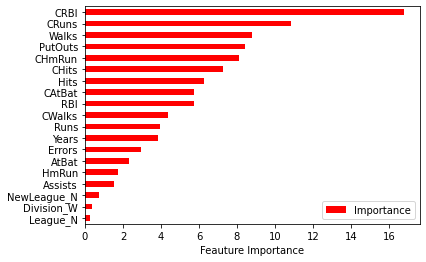

In [ ]:
Importance.sort_values(by = "Importance",axis = 0, ascending = True).plot(kind = "barh", color="r")
plt.xlabel("Feauture Importance")

In [ ]:
## XGBOOOST

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

In [ ]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_train = xgb.DMatrix(data = X_test, label = y_test)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor().fit (X_train, y_train)

[19:10:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#tahmin

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

359.91750599447033

In [ ]:
#model tuning

In [ ]:
xgb_model

XGBRegressor()

In [ ]:
xgb_grid = {
    "colsample_bytree":[0.4, 0.5, 0.6, 0.9,1],
    "n_estimators": [100,200,500,1000],
    "max_depth": [2,3,4,5,6],
    "learning_rate": [0.1,0.01,0.5]
}

In [ ]:
xgb = XGBRegressor()
xgb_cv = GridSearchCV(xgb,
                      param_grid = xgb_grid,
                      cv=10,
                      verbose=2)
xgb_cv.fit(X_train, y_train)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
[CV] END colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=500; total time=   0.1s
[19:12:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=500; total time=   0.1s
[19:12:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=500; total time=   0.1s
[19:12:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=500; total time=   0.1s
[19:12:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.4, learning_rate=

GridSearchCV(cv=10, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [ ]:
xgb_cv.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}

In [ ]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.8
                        ,
                         learning_rate =0.1,
                         max_depth=2,
                         n_estimators=1000)
xgb_tuned = xgb_tuned.fit(X_train, y_train)

[19:21:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#parametrelerin önem sırasına göre grup veya tekli tune edilebilir

In [ ]:
#LightGBM

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_model.predict(X_test, num_iteration= lgbm_model.best_iteration_)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

In [ ]:
lgbm_grid = {
    "n_estimators": [20,40,100,200,500,1000],
    "max_depth": [1,2,3,4,5,6,7,8],
    "learning_rate": [0.1,0.01,0.5,1]
}
lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, verbose=2)

In [ ]:
lgbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=40; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1,

GridSearchCV(cv=10, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [ ]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

In [ ]:
lgbm_tuned = LGBMRegressor(
                         learning_rate =0.1,
                         max_depth=6,
                         n_estimators=20)
                         
lgbm_tuned = lgbm_tuned.fit(X_train, y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

371.5044868943621

In [ ]:
#CatBoost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

In [ ]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

351.194631344607

In [ ]:
#tuning

In [ ]:
catb_grid = {
    "iterations": [200,500,1000,2000],
    "learning_rate":[0.01,0.03,0.05,0.1],
    "depth":[3,4,5,6,7,8]
}

In [ ]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb,catb_grid, cv=5,verbose=2)

In [ ]:
catb_cv_model.fit(X_train,y_train)